In [ ]:


import pandas as pd




In [ ]:
import pandas as pd

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()


In [ ]:
df.shape

In [ ]:
print(df['Seller_Type'].unique())

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

In [ ]:
##checking or missing value
df.isnull().sum()


In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_dataset.head()

In [ ]:
final_dataset['Current_Year']=2020

In [ ]:
final_dataset.head()

In [ ]:
final_dataset['no_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [ ]:
final_dataset.head()

In [ ]:
##final_dataset.drop(['Year','Current_Year'])

In [ ]:
final_dataset.drop(['Year'],axis=1)

In [ ]:
##final_dataset.drop(['Year'],axis=1,inplace=true)

In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head()

In [ ]:
final_dataset.corr()


In [ ]:
##pip install seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(final_dataset)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:



corrmat=final_dataset.corr()

In [ ]:
top_curr_features=corrmat.index

In [ ]:
plt.figure(figsize=(20,20))

In [ ]:
#plot heat map

g=sns.heatmap(final_dataset[top_curr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X=final_dataset.iloc[:,1:]

In [ ]:
Y=final_dataset.iloc[:,0]
X.head()
Y.head()

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

In [ ]:
feat_importences=pd.Series(model.feature_importances_,index=X.columns)
feat_importences.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]


In [ ]:
max_features = ['auto', 'sqrt']

In [ ]:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [ ]:
min_samples_split = [2, 5, 10, 15, 100]

In [ ]:
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [86]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [87]:
rf_random.best_score_

-3.578081753670945

In [88]:
predictions=rf_random.predict(X_test)

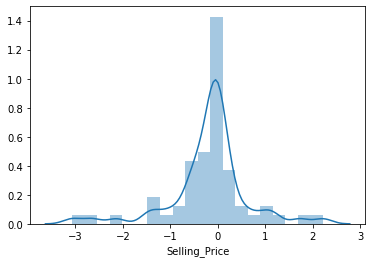

In [90]:
sns.distplot(Y_test-predictions)

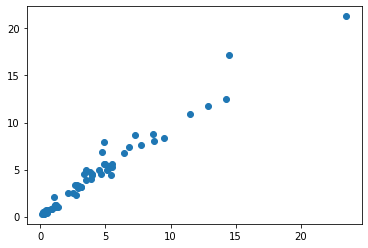

In [91]:
plt.scatter(Y_test,predictions)

In [92]:
from sklearn import metrics

In [95]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.525515081967207
MSE: 0.7283756469048955
RMSE: 0.8534492643999967


In [96]:
import pickle


In [97]:
file = open('random_forest_regression_model.pkl', 'wb')


In [98]:
pickle.dump(rf_random, file)